This dataset includes reviews for restaurants located in New York City. Reviews include product and user id, timestamp, ratings, and a plaintext review. Yelp has a filtering algorithm in place that identifies fake/suspicious reviews and separates them into a filtered list. This Yelp dataset contains both recommended and filtered reviews. We consider them as genuine and fake, respectively. Your goal is to predict whether a review is fake or not, i.e. a binary classification task. The positive classes (+1) are fake reviews and the negative classes are genuine reviews (0). Note that the classes are imbalanced, with around 10% fake reviews.

In [ ]:
#ToDo:
#POS tagging in preprocessing and visual
#problems with average word length  - KeyError
#Feature Extraction: Word2Vec, Bart, Glove, etc.
#Imbalanced Classes
#Modeling

In [3]:
import pandas as pd
import numpy as np
import os

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [309]:
train = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'train.csv', sep=','))
dev = pd.DataFrame(pd.read_csv(os.getcwd() + '/' + 'dev.csv', sep=','))

In [85]:
X_train = train.drop(['label'], axis=1)
y_train = train['label']

In [60]:
X_val = dev.drop(['label'], axis=1)
y_val = dev['label']

### Preprocessing

convert to lower case, remove punctuation from each word, remove remaining tokens that are not alphabetic, filter out stop words.

Pretty slow; maybe look into spaCy instead.

https://realpython.com/natural-language-processing-spacy-python/

```python
!pip install spacy 
!python -m spacy download en

import spacy
nlp = spacy.load('en_core_web_sm')
```

Comparing the two:

https://towardsdatascience.com/text-preprocessing-steps-and-universal-pipeline-94233cb6725a

In [ ]:
# import the necessary libraries 
import nltk
#nltk.download('averaged_perceptron_tagger')

In [307]:
def addDomainFeatures(data):

    length = []
    for i in data.index:
        length.append(len(data['review'][i].split(' ')))
        
    numbers = []
    for i in data.index:
        alph = list(filter(str.isdigit, data['review'][i]))  
        if len(alph) == 0:
            numbers.append(0)
        else:
            numbers.append(sum(map(str.isdigit, alph)) / len(alph))
        
    caps = []
    for i in data.index:
        alph = list(filter(str.isalpha, data['review'][i]))  
        if len(alph) == 0:
            caps.append(0)
        else:
            caps.append(sum(map(str.isupper, alph)) / len(alph))
        
    num_sent = []
    for i in data.index:
        num_sent.append(len(data['review'][i].split('.')))
        
    data['length'] = length
    data['numbers'] = numbers
    data['caps'] = caps
    data['num_sent'] = num_sent
        
#         #avg word length 
#         words = test['review'][i].split(' ')
#         if len(words) == 0:
#             data['avg_words'][i] = 0
#         else:
#             data['avg_words'][i] = sum(len(word) for word in words) / len(words)

        #add percents of POS


In [236]:
#dates
def addDateInfo(data):
    data['my_dates'] = pd.to_datetime(data['date'])
    data['day_of_week'] = data['my_dates'].dt.day_name()
    data['month'] = data['my_dates'].dt.month
    data['year'] = data['my_dates'].dt.year
    data['week_day'] =data['my_dates'].dt.weekday

In [233]:
#POS tagging - To Do
nltk.pos_tag(test['review'][0].split(' '))

[('The', 'DT'),
 ('food', 'NN'),
 ('at', 'IN'),
 ('snack', 'NN'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('selection', 'NN'),
 ('of', 'IN'),
 ('popular', 'JJ'),
 ('Greek', 'NNP'),
 ('dishes.', 'NN'),
 ('The', 'DT'),
 ('appetizer', 'NN'),
 ('tray', 'NN'),
 ('is', 'VBZ'),
 ('good', 'JJ'),
 ('as', 'IN'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('Greek', 'JJ'),
 ('salad.', 'NN'),
 ('We', 'PRP'),
 ('were', 'VBD'),
 ('underwhelmed', 'VBN'),
 ('with', 'IN'),
 ('the', 'DT'),
 ('main', 'JJ'),
 ('courses.', 'NN'),
 ('There', 'EX'),
 ('are', 'VBP'),
 ('4-5', 'JJ'),
 ('tables', 'NNS'),
 ('here', 'RB'),
 ('so', 'RB'),
 ("it's", 'JJ'),
 ('sometimes', 'RB'),
 ('hard', 'RB'),
 ('to', 'TO'),
 ('get', 'VB'),
 ('seated.', 'JJ')]

In [22]:
# import the necessary libraries 
import nltk 
import string 
import re 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# import nltk
# nltk.download('punkt')

# import nltk
# nltk.download('stopwords')

In [242]:
def preprocessing(data):
    
    for i in range(len(data['review'])):
        tokens = word_tokenize(data['review'][i])

        # convert to lower case
        tokens = [w.lower() for w in tokens]

        # remove punctuation from each word
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]

        # remove remaining tokens that are not alphabetic
        words = [word for word in stripped if word.isalpha()]

        # filter out stop words
        stop_words = set(stopwords.words('english'))
        words = [w for w in words if not w in stop_words]

        output = ' '
        output = output.join(words)

        data['review'][i] = output

In [322]:
test = X_train[:15]

addDomainFeatures(test)
addDateInfo(test)
preprocessing(test)

In [323]:
test

,ex_id,user_id,prod_id,rating,date,review,length,numbers,caps,num_sent,my_dates,day_of_week,month,year,week_day
0,0,923,0,3.0,2014-12-08,food snack selection popular greek dishes appe...,40,0,0.0,1,2014-12-08,Monday,12,2014,0
1,1,924,0,3.0,2013-05-16,little place soho wonderful lamb sandwich glas...,53,0,0.0,1,2013-05-16,Thursday,5,2013,3
2,2,925,0,4.0,2013-07-01,ordered lunch snack last friday time nothing m...,31,0,0.0,1,2013-07-01,Monday,7,2013,0
3,3,926,0,4.0,2011-07-28,beautiful quaint little restaurant pretty stre...,90,0,0.0,1,2011-07-28,Thursday,7,2011,3
4,4,927,0,4.0,2010-11-01,snack great place casual sit lunch especially ...,105,0,0.0,1,2010-11-01,Monday,11,2010,0
5,5,928,0,4.0,2009-09-02,solid stars greek food spot fan lamb like must...,41,0,0.0,1,2009-09-02,Wednesday,9,2009,2
6,7,930,0,4.0,2007-05-20,love place try chicken sandwich roasted chicke...,22,0,0.0,1,2007-05-20,Sunday,5,2007,6
7,8,931,0,4.0,2005-12-27,friend intrigued nightly entree special little...,104,0,0.0,1,2005-12-27,Tuesday,12,2005,1
8,10,933,0,5.0,2014-01-21,pretty cool place good food good people,7,0,0.0,1,2014-01-21,Tuesday,1,2014,1
9,12,935,0,5.0,2011-01-31,fabulous authentic greek food little spot bold...,44,0,0.0,1,2011-01-31,Monday,1,2011,0


### Feature Extraction

We have used unigram presence, unigram frequency, bigram presence, bigram frequency and review
length as features for our model. (http://www.ijceronline.com/papers/Vol5_issue5/J055052056.pdf)

We can test which works best:

- Count Vectorizer

Counts number of occurance of each words in vocabulary base. Transforms each review into a feature with vocabulary base. Now we can use any ML model we want. 

Cons: only the occurance of the words not the meaning is taken into consideration aka order ignorant. 

- Tfidf

- Word2Vec

In [294]:
# test = test.dropna

In [97]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 

In [89]:
#CountVectorizer
binary_vectorizer = CountVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_vectorizer.fit(test['review'])
list(binary_vectorizer.vocabulary_.keys())[0:10]
binary_vectorizer.get_feature_names()[0:10]

['able',
 'able eat',
 'able replicate',
 'able stand',
 'absolutely',
 'absolutely delicious',
 'absolutely loved',
 'absolutely recommend',
 'accept',
 'accept credit']

In [94]:
X_train_binary = binary_vectorizer.transform(test['review'])

In [95]:
X_train_binary

<50x1970 sparse matrix of type '<class 'numpy.int64'>'
	with 2654 stored elements in Compressed Sparse Row format>

In [247]:
#TfidfVectorizer
binary_Tfidf_vectorizer = TfidfVectorizer(binary=True, ngram_range=(1, 2), stop_words='english')
binary_Tfidf_vectorizer.fit(test['review'])
list(binary_Tfidf_vectorizer.vocabulary_.keys())[0:10]
binary_Tfidf_vectorizer.get_feature_names()[0:10]

#stores data in sparse matrix
X_train_binary_Tfidf = binary_Tfidf_vectorizer.transform(test['review'])

In [100]:
X_train_binary_Tfidf

<50x1970 sparse matrix of type '<class 'numpy.float64'>'
	with 2654 stored elements in Compressed Sparse Row format>

In [ ]:
#word2vec and others


### Creating training dataset

In [ ]:
from scipy import sparse

In [245]:
test.columns

Index(['ex_id', 'user_id', 'prod_id', 'rating', 'label', 'date', 'review',
       'length', 'numbers', 'caps', 'num_sent', 'avg_words', 'my_dates',
       'day_of_week', 'month', 'year', 'week_day'],
      dtype='object')

In [248]:
#create training data with old features and new features
num_feats = test[['user_id', 'rating', 'length', 'numbers', 
                  'caps', 'num_sent', 'avg_words']].values

training_data = sparse.hstack((X_train_binary_Tfidf, num_feats))

### Visulizations
Usually the length of fake review will be on the lesser side because of the following reasons:
- Reviewer will not have much knowledge about the product/business.
- Reviewer tries to achieve the objective with as few words as possible.

In [130]:
import matplotlib.pyplot as plt

In [138]:
import seaborn as sns

In [295]:
testing = train.copy()

In [ ]:
addDomainFeatures(testing)

In [313]:
addDateInfo(testing)

In [314]:
testing.head()

,ex_id,user_id,prod_id,rating,label,date,review,length,numbers,caps,num_sent,my_dates,day_of_week,month,year,week_day
0,0,923,0,3.0,1,2014-12-08,The food at snack is a selection of popular Gr...,40,1.0,0.035714,5,2014-12-08,Monday,12,2014,0
1,1,924,0,3.0,1,2013-05-16,This little place in Soho is wonderful. I had ...,52,0.0,0.028846,5,2013-05-16,Thursday,5,2013,3
2,2,925,0,4.0,1,2013-07-01,ordered lunch for 15 from Snack last Friday. ...,32,1.0,0.028986,4,2013-07-01,Monday,7,2013,0
3,3,926,0,4.0,1,2011-07-28,This is a beautiful quaint little restaurant o...,90,0.0,0.020725,8,2011-07-28,Thursday,7,2011,3
4,4,927,0,4.0,1,2010-11-01,Snack is great place for a casual sit down lu...,102,0.0,0.021186,13,2010-11-01,Monday,11,2010,0


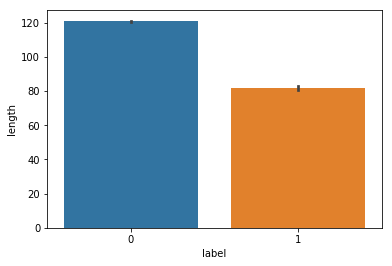

In [315]:
ax = sns.barplot(x="label", y="length", data=testing)

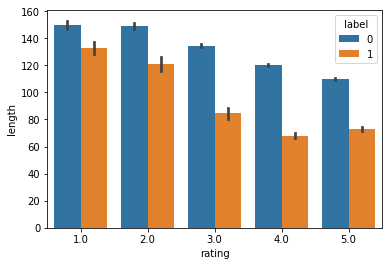

In [316]:
ax = sns.barplot(x="rating", y="length", hue="label", data=testing)

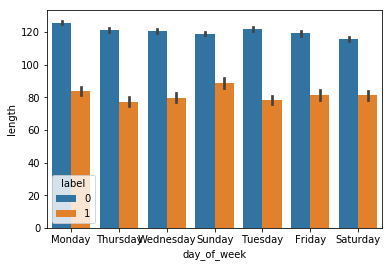

In [317]:
ax = sns.barplot(x="day_of_week", y="length", hue="label", data=testing)

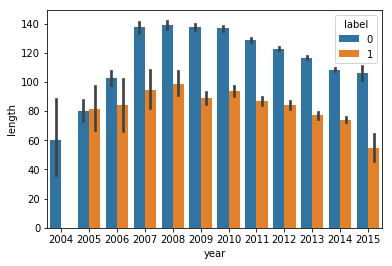

In [318]:
ax = sns.barplot(x="year", y="length", hue="label", data=testing)

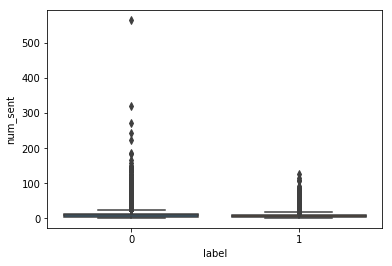

In [324]:
#number of sentences
ax = sns.boxplot(x="label", y="num_sent", data=testing)

In [ ]:
#POS visual

In [ ]:
#word visualization
#scatter plot or line plot 
#userid chart to show why we are including it in the training datatset

### Imabalanced Classes

SMOTE

### Modeling
Naïve Bayes Classifier, Support Vector
Machines and Logistic Regression classifiers

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc

#L O G I S T I C  R E G R E S S I O N 
#CountVectorizer
countvec_LR_model = LogisticRegression()
countvec_LR_model.fit(X_train_binary, Y_train)
countvec_LR_fpr, countvec_LR_tpr, countvec_LR_thresholds = roc_curve(Y_test, countvec_LR_model.predict_proba(X_test_binary)[:,1])
countvec_LR_auc = auc(countvec_LR_fpr, countvec_LR_tpr)

#TfidfVectorizer
Tfidf_LR_model = LogisticRegression()
Tfidf_LR_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_LR_fpr, Tfidf_LR_tpr, Tfidf_LR_thresholds = roc_curve(Y_test, Tfidf_LR_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_LR_auc = auc(Tfidf_LR_fpr, Tfidf_LR_tpr)

#B E R N O U L L I  N B 
#CountVectorizer
countvec_NB_model = BernoulliNB()
countvec_NB_model.fit(X_train_binary, Y_train)
countvec_NB_fpr, countvec_NB_tpr, countvec_NB_thresholds = roc_curve(Y_test, countvec_NB_model.predict_proba(X_test_binary)[:,1])
countvec_NB_auc = auc(countvec_NB_fpr, countvec_NB_tpr)

#TfidfVectorizer
Tfidf_NB_model = BernoulliNB()
Tfidf_NB_model.fit(X_train_binary_Tfidf, Y_train)
Tfidf_NB_fpr, Tfidf_NB_tpr, Tfidf_NB_thresholds = roc_curve(Y_test, Tfidf_NB_model.predict_proba(X_test_binary_Tfidf)[:,1])
Tfidf_NB_auc = auc(Tfidf_NB_fpr, Tfidf_NB_tpr)